# Autoencoders

Autoencoders are a part of the "Generative modeling" paradigm in Machine learning research, where the aim is to model the distribution $P(X)$ given datapoints $X$ in some high dimensional space $\mathbb{R}^m$. They can be thought of neural networks that essentially try to copy the input to output.


More formally, autoencoders consist of an encoding and a decoding layer. Given an input $\mathbf{x}$, the encoding layer represents the input into its coded form $h = f(\mathbf{x})$ while the decoding layer provides a reconstruction of the original input $r = g(h) = g(f(x)) \approx x$ such that a loss $L(g(f(x)), x)$ is minimized, where $L$ is a loss function that penalizes $g(f(x))$ for being dissimilar to $x$. Autoencoders with dimensions less than the original dimension of input $\mathbf{x}$ are called undercomplete autoencoders.

## PCA

When the decoding function is linear and the loss is mean squared loss, the undercomplete autoencoders is known to span the same subspace as PCA.

## Sparse Autoencoders

Sparse autoencoders are autoencoders with a sparsity penalty $\Omega(h)$ on the encoding layer $h = f(x)$.

$$L(\mathbf{x}, g(f(\mathbf{x})) + \Omega(h)$$

The sparsity constraint ensures that the autoencoder learns unique statistical properties of the data, rather than acting just as a copy-paste function.

## A more intuitive explaination

The overall aim of autoencoders is to be able to model the true probability distribution $P_{true}(X)$ of a given dataset $X$. Since $P_{true}(X)$ is unknown, our aim is to learn an alternate distribution $P(X)$m such that $P(X)$ is "close" to $P_{true}(X)$. We want to avoid putting restrictions on the structure of data and we also want the solution to be tractable (in a computationally expensive context) even for large datasets.

We will focus on a special category of autoencoders called the "Variational Autoencoders" (VAE) for the rest of our sections.

## Sparse Autoencoders and Latent Variables

The sparsity constranint in Sparse Autoencoders can be understood  as an approximation of the maximum likelhood training of a generative model that has latent variables.


### Latent Variables

Consider a setting where our dataset includes objects like trees, house, and cat and dog pictures. We want to be able to generate images which looks the ones in our dataset, but not exactly the same. If we are able to generate the left half of a tree, then the right half of it will be very different from the right half of a dog. Before we generate any image, it is useful (and essential) to think about the kind of image we are going to generate to ensure that the pixels are coherent with the image we are going to generate.

Before our model generates these images, it will randomly pick up an object $z$ from $\{\text{tree}, \text{house}, \text{cat}, \text{dog}\}$ and make sure that all pixels in that image are "coherent" in some sense: you do not expect green patches to appear on the right. This $z$ is a latent variable. It is latent because given a new generated image, we do not know which settings of the latent variable generated the final image. $z$ for example could be the patten of edges in our images.

For the model to be representative of the data $X$, there should be atleast on configuration of the latent variable $z$ such that the data generated resembles all datapoints in $X$. 

More formally, the distribution $P(X)$ is modelled using a generative process conditioned on the latent variable $Z$ and we want to maximize $P(X)$. We have a way of sampling $Z$ using some distribution $P(z)$ and this a deterministic funtion $f(z;\theta)$ parameterized by $\theta$. We wish to optimize $\theta$, such that $f(z;\theta)$ generates samples that look like $X$

We want to maximize $P(X)$ for each $X$ in the training set, to be able to hope that this model will be able to generate "similar" samples.
$$
P(X) = \int P(z)P(X|z;\theta)dz
$$

where $P(X|z;\theta) = f(z; \theta)$.

In VAEs, the choice of this function $P(X|z;\theta) = \mathcal{N}(X| f(z;\theta), \sigma^2I)$, but this is not a hard requirement. If $X$ is binary, $P(X|z;\theta)$ could be bernoulli. It can be any distribution other than a dirac-delta,  as long as it is computable.

VAEs solve this problem of "generative modeling" by telling us what our choice of latent variable $z$ should be and how to overcome the integral involved over all such values of $z$.

Before our model starts generating any images, it needs to make some decisions. It needs to first decide what image it will be generating, than decide the angles, stroke width etc. We want to avoid deciding such properties by hand and we also want to avoid describing any sort of dependencies this latent variable should capture (the house images for example, always has more edges). VAEs take a very unintuitve approach of dealing with this by imposing a gaussian distribution on $z \sim \mathcal{N} (0, \sigma^2I)$. How does that work?


Any distrbution in $d$ dimensions can be generated by taking a set of $d$ gaussian random variables and passing them through some non-linear transformation. For example we can generate a 2D ring starting with a 2D multivariate gaussian using this transformation: $g(z) = z/\alpha + z/||z||$ where $z \sim N(0, \sigma^2I)$ and $\alpha$ is a shrinkage parameter. An example is given below:








Populating the interactive namespace from numpy and matplotlib


/home/saket/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


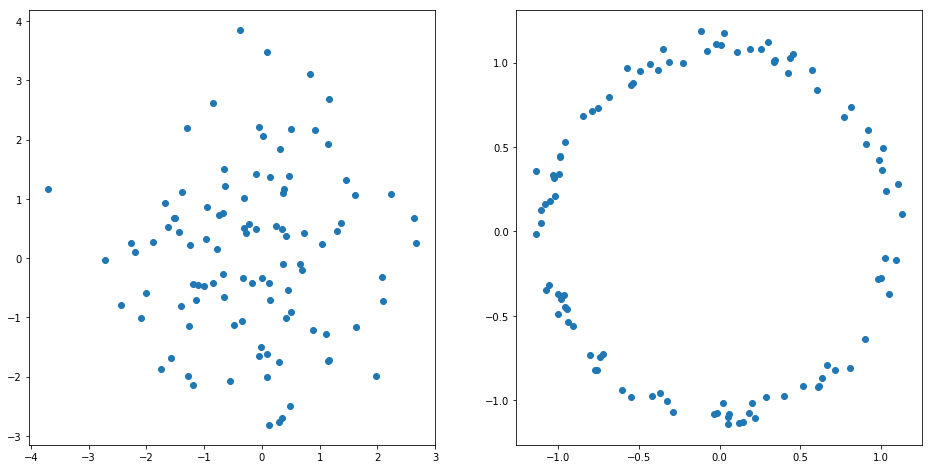

In [17]:
% pylab inline
from numpy import linalg as LA
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_gaussian(shrinkage):
    """Transform a gaussian blob to a ring.""" 
    np.random.seed(42)
    mean = [0, 0]
    cov = [[2, 0], [0, 2]]

    fig = plt.figure(figsize=(16, 8))
    x = np.random.multivariate_normal(mean, cov, 100)
    y = x/shrinkage + x/LA.norm(x, 2, axis=1)[:, None]
    ax = plt.subplot(121)
    ax.scatter(x[:,0], x[:,1])
    ax = plt.subplot(122)
    ax.scatter(y[:,0], y[:,1])
    
    
#interact(plot_gaussian, shrinkage=widgets.IntSlider(min=1, max=300, step=1,value=1))

plot_gaussian(shrinkage=20)

So if we start with a normally distributed $z$, then a neural network can uses its first few layers to learn the distribution of the "actual" latent variable (the $g(z)$ transformation above) and then use the next layers to map those learned latent variables to the actual image. The netwok will inherently learn the latent structure in the data by itself.

## Objective function

For most choices of $z$ $P(X|z)$ will be close to zero. So VAEs tend to sample only those values of $z$ which are more probably of generating $X$. So we are interested in a function $Q(z|X)$ that takes the data $X$ and gives us a distribution over $z$ that are likely to produce $X$. Ideally, the space spanned by $Q(z|X)$ is much smaller than the "prior" distribution $P(z)$.





$$
KL(Q(z) || P(z|X)) = E_{z \sim Q}[\log{Q(z)} - \log{P(z|X)}]
$$

$$P(z|X) = \frac{P(X|z)P(z)}{P(X)}$$

$$
KL(Q(z) || P(z|X)) = E_{z \sim Q}[\log{Q(z)} + \log{P(X)} - \log{P(X|z)} - \log{P(z)}]
$$

$$
KL(Q(z) || P(z|X)) = E_{z \sim Q}[\log{Q(z)} - \log{P(z)}]+ \log{P(X)} - E_{z\sim Q}[ \log{P(X|z)} ]
$$

$$
KL(Q(z) || P(z|X)) = KL(Q(z)||P(z)) + \log{P(X)} - E_{z\sim Q}[ \log{P(X|z)} ]
$$


$$
\log{P(X)} - KL(Q(z) || P(z|X)) = E_{z\sim Q}[ \log{P(X|z)} ] - KL(Q(z)||P(z))
$$

We want to maximize the quantity on left hand side because we want to maximize $\log(P(x))$, however we alos want to penalize $Q(z)$ if it does not resemble the "true" unknown distribution $P(z|X)$
Alternatively, our loss function for performing gradient descent is given by:

$$
KL(Q(z) || P(z)) - E[\log{P(X|z)}]
$$

where the first term denotes the information lost in representing $P(z)$ as $Q(z)$ and the second term denotes the reconstruction loss

So  we want $KL(Q(z) || P(z|X))$ to be minimized. If we find a magic function $Q(z)$ which can approximate $P(z|X)$ perfectly, $KL(Q(z) || P(z|X)) = 0$.

## What should be ideal $Q(z|X)$?

Answer: $Q(z|X) = \mathcal{N}(z|X, \sum)$ just works.

To perform gradient descent on the right hand side, we take one sample of $z$ and treat one sample of that as an approximation of $E[\log{P(X|z)}]$, this is performed over all datapoints, say $D$

$$
E_{X \sim D}[\log{P(X)} - KL(Q(z) || P(z|X))] = E_{X \sim D}[E_{z\sim Q}[ \log{P(X|z)} ] - KL(Q(z)||P(z))]
$$

We can just take the gradient of this equation and everything looks okay. However, during backpropogation, we will encounter a layer that is sampling $z$ from $Q(z|X)$ which is itself a stochastic unit. In order to be able to sample from $Q(z|X) \sim \mathcal{N} (\mu(X), \sum(X))$ we first sample $\epsilon \sim \mathcal{N}(0, I)$ and then compute $ z= \mu(X) + \sum^{1/2}(X)\epsilon$. This is called the reparameterization trick.





## KL divergence between two gaussins

Assume $q \sim \mathcal{N}(\mu_0, \sigma_0^2)$ and $p \sim \mathcal{N}(\mu_1, \sigma_1^2)$: 

\begin{align*}
KL(q||p) &= \int q(x) ( \log(q(x)  - \log(p(x)) dx\\
q(x) &= (2\pi \sigma_0^2)^{-\frac{1}{2}} \exp{\frac{-(x-\mu)^2}{2\sigma_0^2}}\\
\log{q(x)} &= -\frac{1}{2} \log{2\pi} - \log(\sigma_0) - \frac{-(x-\mu)^2}{2\sigma_0^2}\\
KL(q||p) &= \int q ( \log{\frac{\sigma_1}{\sigma_0}} + \frac{(x-\mu_1)^2}{2\sigma_1^2} - \frac{(x-\mu_0)^2}{2\sigma_0^2}) dx\\
\int q \frac{(x-\mu_0)^2}{2\sigma_0^2}dx &= \frac{1}{2\sigma_0^2}\\
\int q \frac{(x-\mu_1)^2}{2\sigma_1^2}dx &= \frac{1}{2\sigma_1^2} (\int x^2 q dx + \int q \mu_1^2 - \int 2 \mu_1 x q dx)\\
&= \frac{EX^2 + \mu_1^2 - 2\mu_1EX}{2\sigma_1^2}\\
&=  \frac{\sigma_0^2 + \mu_0^2 + \mu_1^2 - 2\mu_1\mu_0}{2\sigma_1^2}\\
&= \frac{\sigma_0^2 +  (\mu_1-\mu_0)^2}{2\sigma_1^2}\\
KL(q||p) &= \log {\frac{\sigma_1}{\sigma_0}} - \frac{1}{2\sigma_0^2} + \frac{\sigma_0^2 +  (\mu_1-\mu_0)^2}{2\sigma_1^2}
\end{align*}

In [1]:
import tensorflow as tf
import numpy as np
import time

tf.enable_eager_execution()
tfe = tf.contrib.eager
TFKL = tf.keras.layers

In [2]:
def loss(model, x, x_reconstructed):
    mu = model.mu
    sigma = model.sigma
    epsilon = 1e-10
    reconstruction_loss = -tf.reduce_sum(
        x * tf.log(epsilon+x_reconstructed) + (1-x) * tf.log(epsilon+1-x_reconstructed), 
        axis=1
    )
    reconstruction_loss = tf.reduce_mean(reconstruction_loss) 
    latent_loss = -0.5 * tf.reduce_sum(1. + tf.log(sigma) - tf.square(mu) - tf.square(sigma), axis=-1)
    latent_loss = tf.reduce_mean(latent_loss)    
    total_loss = reconstruction_loss + latent_loss
    return total_loss, latent_loss, reconstruction_loss

class VAE(tf.keras.Model):
    def __init__(self, data_format='channels_first', n_latent=10):
        """ Define VAE
        
        Parameters
        ----------
        data_format: string 
                     'channels_first' or 'first_channels'
                      
        n_latent: int
                  Number of latent channels to use
                  
        data_format: Either 'channels_first' or 'channels_last'.
        'channels_first' is typically faster on GPUs while 'channels_last' is
        typically faster on CPUs. See
        https://www.tensorflow.org/performance/performance_guide#data_formats
        
        Won't matter in our case, but still.
        
        """
        super(VAE, self).__init__()
        # Encoder dense layers
        self.n_latent = n_latent
        self.data_format = data_format
        if data_format == 'channels_first':
            self._input_shape = [-1, 1, 28, 28]
        else:
            assert data_format == 'channels_last'
            self._input_shape = [-1, 28, 28, 1]
            
        self._image_size = np.abs(np.product(self._input_shape))         
        
        # Encoder
        self.edense1 = TFKL.Dense(activation='relu', units=512)
        self.edense2 = TFKL.Dense(activation='relu', units=512)
        self.edense3 = TFKL.Dense(activation='relu', units=512)        
        self.edense4 = TFKL.Dense(activation=None,
                                  units=self.n_latent)
        self.edense5 = TFKL.Dense(activation=None,
                                  units=self.n_latent)
        
        # Decoder
        self.ddense1 = TFKL.Dense(activation='relu', units=512)
        self.ddense2 = TFKL.Dense(activation='relu', units=512)
        self.ddense3 = TFKL.Dense(activation='relu', units=512)
        self.reconstructed = TFKL.Dense(activation='sigmoid', 
                                        units=self._image_size)# units=original_dim)

    
    def _raparametrize(self, mu, sigma):                     
        eps = tf.random_normal(shape=tf.shape(sigma))
        z = mu + sigma * eps
        return z
    
    def encoder(self, x):
        result = self.edense1(x)
        result = self.edense2(result) 
        result = self.edense3(result) 
        mu = self.edense4(result)   
        log_sigma2 = self.edense5(result)   
        sigma = tf.exp(log_sigma2 * 0.5)
        return mu, sigma
    
    def decoder(self, z):
        result = self.ddense1(z)
        result = self.ddense2(result)
        result = self.ddense3(result)
        result = self.reconstructed(result)
        return result
    
    
    def call(self, inputs):
        """Run the model."""
        
        # Encoder
        #x = tf.reshape(inputs, self._input_shape)
        mu, sigma = self.encoder(inputs)
        z = self._raparametrize(mu, sigma)
        self.mu = mu
        self.z = z
        self.sigma = sigma
        # Decoder
        reconstructed = self.decoder(z)
        return reconstructed, mu, sigma        
    
    def reconstruct(self, x):
        return self.call(x)
    

In [3]:
batch_size = 100
num_epochs = 12
image_size = 728

def get_test_dataset():
    """Get testing data as tf.data.Dataset object"""
    _, test = tf.keras.datasets.mnist.load_data()    
    test_data, test_labels = test
    test_data = test_data.astype('float32')/255
    test_data = test_data.reshape((test_data.shape[0], 28 * 28))
    test_labels = test_labels.astype('int32')
    test_dataset = tf.data.Dataset.from_tensor_slices((test_data,
                                                       test_labels))
    return test_dataset

def get_train_dataset(batch_size):
    """Get training data as tf.data.Dataset object"""
    train, _ = tf.keras.datasets.mnist.load_data()
    train_data, train_labels = train
    train_data = train_data.astype('float32')/255
    train_data = train_data.reshape((train_data.shape[0], 28 * 28))
    train_labels = train_labels.astype('int32')
    n_batches = train_data.shape[0] // batch_size
    train_dataset = tf.data.Dataset.from_tensor_slices((train_data,
                                                        train_labels
                                                        ))
    
    train_dataset = train_dataset.shuffle(batch_size * 5)
    train_dataset = train_dataset.batch(batch_size=batch_size)
    return train_dataset, n_batches

def trainer(n_latent=10, 
            learning_rate=1e-4,
            batch_size=100,
            n_epochs=50):
    total_errors = []
    reconstruction_errors = []
    latent_errors = []
    with tf.device('/gpu:0'):
        model = VAE(n_latent=n_latent)
        optimizer = tf.train.AdamOptimizer(learning_rate)    
        train_dataset, n_batches  = get_train_dataset(batch_size)
        
        for epoch in range(n_epochs):
            for batch, (images, _) in enumerate(train_dataset):             
                with tf.GradientTape() as tape:
                    x_reconstructed, mu, sigma = model(images)   
                    total_loss, latent_loss, reconstruction_loss = loss(model, images, 
                                                                        x_reconstructed) 
                    
                    gradients = tape.gradient(total_loss, model.variables)
                    grad_vars = zip(gradients, model.variables)
                    optimizer.apply_gradients(grad_vars, tf.train.get_or_create_global_step())
                    if (epoch % 5 == 0) and (batch % 100) == 0:
                        print ('Epoch: {}/{} |  Batch: {}/{} | Total loss: {:.2f} | Latent loss: {:.2f} | Reconstruction Loss: {:.2f}'.format(epoch+1,
                                                                                                                                              n_epochs,
                                                                                                                                              batch+1,
                                                                                                                                              n_batches,                                                      
                                                                                                                                              total_loss,                                                       
                                                                                                                                              latent_loss,
                                                                                                                                              reconstruction_loss))
                total_errors.append(total_loss.numpy())
                reconstruction_errors.append(reconstruction_loss.numpy())
                latent_errors.append(latent_loss.numpy())
        return model, total_errors, reconstruction_errors, latent_errors

In [4]:
model, total_errors, reconstruction_errors, latent_errors = trainer()

Epoch: 1/50 |  Batch: 1/600 | Total loss: 544.68 | Latent loss: 0.24 | Reconstruction Loss: 544.44
Epoch: 1/50 |  Batch: 101/600 | Total loss: 220.53 | Latent loss: 5.53 | Reconstruction Loss: 215.00
Epoch: 1/50 |  Batch: 201/600 | Total loss: 210.45 | Latent loss: 1.92 | Reconstruction Loss: 208.53
Epoch: 1/50 |  Batch: 301/600 | Total loss: 195.56 | Latent loss: 2.06 | Reconstruction Loss: 193.49
Epoch: 1/50 |  Batch: 401/600 | Total loss: 188.86 | Latent loss: 2.63 | Reconstruction Loss: 186.24
Epoch: 1/50 |  Batch: 501/600 | Total loss: 173.45 | Latent loss: 3.08 | Reconstruction Loss: 170.37
Epoch: 6/50 |  Batch: 1/600 | Total loss: 110.41 | Latent loss: 9.49 | Reconstruction Loss: 100.92
Epoch: 6/50 |  Batch: 101/600 | Total loss: 114.33 | Latent loss: 9.68 | Reconstruction Loss: 104.65
Epoch: 6/50 |  Batch: 201/600 | Total loss: 111.94 | Latent loss: 9.63 | Reconstruction Loss: 102.30
Epoch: 6/50 |  Batch: 301/600 | Total loss: 107.44 | Latent loss: 9.27 | Reconstruction Loss: 9

Populating the interactive namespace from numpy and matplotlib


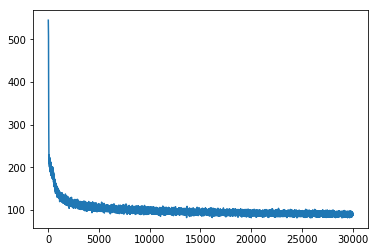

In [5]:
%pylab inline
plt.plot(total_errors)

Populating the interactive namespace from numpy and matplotlib


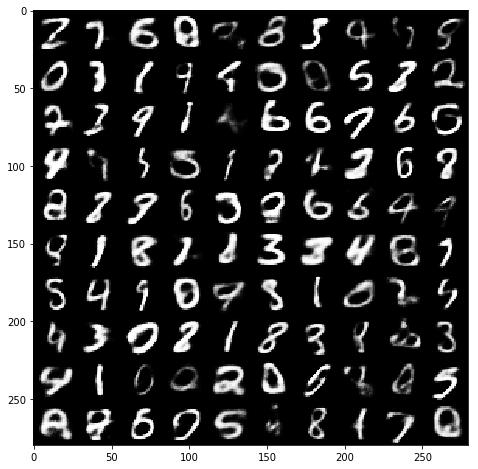

In [6]:
# Test the trained model: generation
%pylab inline
# Sample noise vectors from N(0, 1)
n_latent = 10
z = np.random.normal(size=[batch_size, n_latent])
x_generated = model.decoder(z)

w = h = 28
n = np.sqrt(batch_size).astype(np.int32)
I_generated = np.empty((h*n, w*n))

for i in range(n):
    for j in range(n):
        I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = tf.reshape(x_generated[i*n+j, :],[28, 28])

plt.figure(figsize=(8, 8))
plt.imshow(I_generated, cmap='gray')


In [8]:
test_dataset = get_test_dataset()
test_dataset = test_dataset.batch(batch_size)
iteration = test_dataset.make_one_shot_iterator()

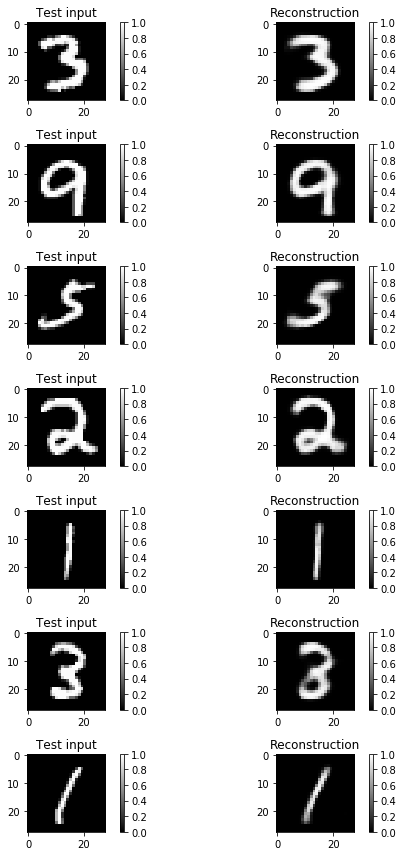

In [14]:
x_test, x_label = iteration.get_next()
x_reconstruct , mu, sigma  = model.reconstruct(x_test)

plt.figure(figsize=(8, 12))
for i in range(7):

    plt.subplot(7, 2, 2*i + 1)
    plt.imshow(tf.reshape(x_test[i], [28, 28]), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(7, 2, 2*i + 2)
    plt.imshow(tf.reshape(x_reconstruct[i], [28, 28]), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

# References 

[1]. [Auto-Encoding Variational Bayes](https://arxiv.org/abs/1312.6114)

[2]. [Tutorial on Variational Autoencoders](https://arxiv.org/abs/1606.05908)
